# 数据分析综合实验
Python拥有丰富的第三方模块，能够实现科学计算、Web开发、数据库接口、图形系统等多个领域的功能。

在数据分析领域，由于Python的库不断进行改良，使其成为数据分析任务的重要工具。其中Pandas模块是Python最强大的数据分析和探索工具，它支持对结构化数据的增、删、查、改操作，并且带有丰富的数据处理函数，能灵活处理原始数据中的缺失数据，并提供时间序列分析等功能。

matplotlib.pyplot 模块提供了类似于MATLAB的界面，可以生成图表、直方图、功率谱、条形图、误差图、散点图等可视化图形，实现数据分析结果的可视化。

本实验将进行一个具体的python数据分析项目实践。

## 数据分析的一般流程

### 1 数据预处理
数据预处理的步骤包括数据清理和数据转换，目的是为之后的数据分析做好准备。在进行数据预处理之前，先介绍一下本节项目实践的数据来源。

### 1.1 数据说明
此次项目实践的数据源为COVID-19中的confirmed_global时间序列数据集：`time_series_covid19_confirmed_global.csv`

In [1]:
import pandas as pd
raw_data = pd.read_csv('time_series_covid19_confirmed_global.csv',na_values='?') #设定'?'为缺失值

In [2]:
raw_data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20',
       '5/8/20', '5/9/20', '5/10/20'],
      dtype='object', length=114)

In [3]:
raw_data[:10]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,106,106,106,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3030,3035,3033,3035,3042,3044,3047,3051,3053,3053


In [4]:
raw_data.isnull().any() #检查含有缺失值的列

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/6/20            False
5/7/20            False
5/8/20            False
5/9/20            False
5/10/20           False
Length: 114, dtype: bool

In [5]:
raw_data.shape

(266, 114)

##### 该数据集包含$4+n$个字段, 260多个元组。前4个字段名称及说明如下：

1)	Province/State：所属省/州；

2)	Country/Region：所属国家/地区；

3)	Lat：地理位置之经度；

4)	Long：地理位置之纬度；

##### 后$n$个字段为日期，开始于2020年1月22日（'1/22/20'）

利用该数据集进行数据分析的目的是在数据预处理（包括缺失值、重复值处理和数据规范化等）后，统计变量的集中趋势、离中趋势。

### 1.2 数据探索 

数据清理通常包括缺失值处理、异常值处理和重复值处理，由于异常值处理涉及数据挖掘中的离群点检测问题，

**<font color=Red>在本节中不进行操作，读者若感兴趣可自行查阅利用Python进行数据挖掘的相关书籍进行深入学习。**


#### （1）缺失值处理

①	利用pandas的isnull()方法检查缺失值。

代码如下,
由输出结果可知，Province/State列存在缺失值:

In [6]:
raw_data[raw_data.isnull().values==True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,16,16,16,23,174,174,187,208,208,208
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7,10,10,12,22,25,25,34,34,51
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,1,3,3,3,3,8,8,8,11,11


②	利用pandas的fillna()方法填充缺失值。

代码如下：

In [7]:
fill_na = lambda col:col.fillna('not know')#定义fill_na函数，用'not know'字符串填充缺失值
fill_data = raw_data.apply(fill_na, axis=0) #将填充后的数据赋给fill_data
fill_data.isnull().any() #检查是否填充成功

Province/State    False
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/6/20            False
5/7/20            False
5/8/20            False
5/9/20            False
5/10/20           False
Length: 114, dtype: bool

由输出结果可知，填充后的数据中不存在缺失值。

In [8]:
fill_data[:10]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,not know,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,not know,Albania,41.1533,20.1683,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,not know,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,not know,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,not know,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
5,not know,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,not know,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034
7,not know,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,106,106,106,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3030,3035,3033,3035,3042,3044,3047,3051,3053,3053


#### （2）重复值处理
通过pandas的duplicated()方法判断数据集中是否存在重复值。

代码如下：


In [9]:
isDuplicated=fill_data.duplicated() #判断重复数据记录
print(isDuplicated)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


由输出结果可知，数据集中不存在重复记录，因此不用进行重复值处理。

#### （3） 了解数据内容

初步了解数据的构成，理解数据的含义。例如，显示国家(`Country/Region`)为`'China'`的数据。

In [10]:
fill_data[fill_data['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,593,593,593,593,593,593,593,593,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,356,356,356,356,356,356,356,356,356,356
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1588,1588,1588,1588,1588,1589,1589,1589,1589,1589
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,328,328,328,328,328,328,328,328,328,328


**如上所示：** 数据表的内容为按国家/地位的省份分类的时间序列数据。

### 1.3 数据清理

数据转换通常包括规范化和连续属性离散化，另外，可以把无关的属性从数据集中删除，便于后续分析。

在本实验中，仅对各个国家/地区的数据进行分析操作，不涉及省/州（Province/State）和地理位置（Lat，Long）等属性，这些属性可删除。

删除Lat, Long, Province/State属性, 代码如下：

In [11]:
data = fill_data.drop(['Province/State','Lat','Long'],axis=1) #删除属性列

data[:10]

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,Albania,0,0,0,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,Algeria,0,0,0,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,Andorra,0,0,0,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,Angola,0,0,0,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,Argentina,0,0,0,0,0,0,0,0,0,...,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034
7,Armenia,0,0,0,0,0,0,0,0,0,...,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313
8,Australia,0,0,0,0,0,0,0,0,0,...,106,106,106,107,107,107,107,107,107,107
9,Australia,0,0,0,0,3,4,4,4,4,...,3030,3035,3033,3035,3042,3044,3047,3051,3053,3053


### 1.4 数据转换

本实验以国家/地区属性为整体来进行数据分析，需要对数据进行聚集（aggregation）操作，例如，按Country/Region并求和。

In [12]:
data = data.groupby('Country/Region').sum()   # 按Country/Region并求和

In [13]:
data[:10]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
Albania,0,0,0,0,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
Algeria,0,0,0,0,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
Andorra,0,0,0,0,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
Angola,0,0,0,0,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
Argentina,0,0,0,0,0,0,0,0,0,0,...,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034
Armenia,0,0,0,0,0,0,0,0,0,0,...,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313
Australia,0,0,0,0,4,5,5,6,9,9,...,6778,6799,6822,6847,6875,6894,6913,6918,6939,6948


In [14]:
print(data.index.values) #列出全部可索引的Country/Region名称

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

取中、美、英...等国家的数据进行展示

In [15]:
data_us = data[data.index.isin(['US','China','United Kingdom','Italy','Germany','France'])]
data_us

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83959,83959,83964,83966,83968,83970,83975,83976,83990,84010
France,0,0,2,3,3,3,4,5,5,5,...,167305,168518,168925,169583,170687,174224,174918,176202,176782,177094
Germany,0,0,0,0,0,1,4,4,4,5,...,164077,164967,165664,166152,167007,168162,169430,170588,171324,171879
Italy,0,0,0,0,0,0,0,0,0,2,...,207428,209328,210717,211938,213013,214457,215858,217185,218268,219070
US,1,1,2,2,5,5,5,5,5,7,...,1103461,1132539,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,178685,183500,187842,191832,196243,202359,207977,212629,216525,220449


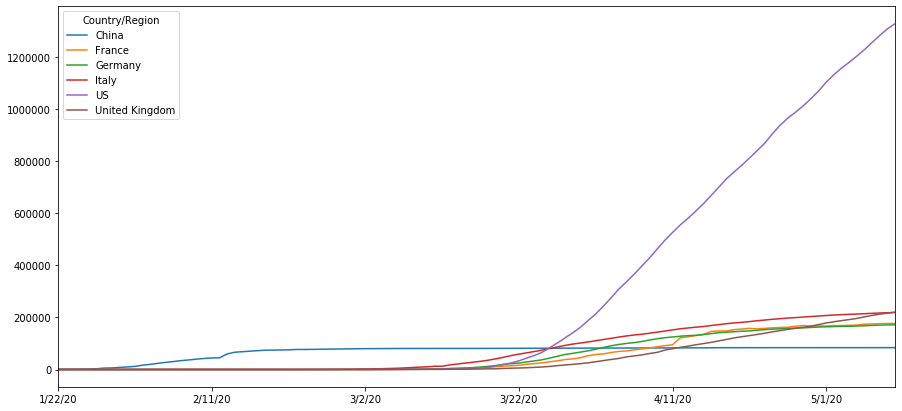

In [16]:
data_us.T.plot(figsize=(15,7))   #数据趋势图

## 2 数据分析实践

**<font color = 'red'>请完成下面的数据分析任务。**

### 2.1 数据分布

1、根据最新的数据，将统计数据划分为：(0, 1000]、(1000, 5000]、(5000,10000]、(10000,50000]、(50000, 100000]、(100000,200000]、(200000,500000]、(500000,1000000]、(1000000,5000000]等若干个区间，分别统计各个区间的Country/Region数目。

2、绘制上面区间的统计数据分布图（条形图）。

### 2.2 数据转换

1、找到最新数据排名前$15$的国家。

2、构建一个新的DataFrame对象（16 rows，命名为`top15_others`），包含排名前$15$国家的每日数据、及其余国家（其余国家命名为`'Others'`）每日数据的总和。

3、构建一个新的DataFrame（16 rows，命名为`increment`），包含前$15$国家及其余国家（其余国家命名为`'Others'`)的每日增量。<br>

### 2.3 统计趋势

1、统计排名前$15$的国家、及其余国家（`'Others'`）最新数据的比例，并绘制饼状图。

2、绘制以上增量数据集的趋势图（按时间坐标绘制的折线图）。